In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

In [3]:
data = pd.read_csv("Data/dataset_part_2.csv")
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,8191.07911,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,1
1,2,2012-05-22,Falcon 9,525.00000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,1
2,3,2013-03-01,Falcon 9,677.00000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,1
3,4,2013-09-29,Falcon 9,500.00000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.00000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,1


In [4]:
X = pd.read_csv('Data/dataset_part_3.csv')
X.head(100)

,CCSFS SLC 40,KSC LC 39A,VAFB SLC 4E,5e9e3032383ecb267a34e7c7,5e9e3032383ecb554034e7c9,5e9e3032383ecb6bb234e7ca,5e9e3032383ecb761634e7cb,5e9e3033383ecb075134e7cd,5e9e3033383ecbb9e534e7cc,B0003,...,GTO,HEO,ISS,LEO,MEO,PO,SO,SSO,TLI,VLEO
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
97,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
98,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
Y = data["Class"].to_numpy()
transform = preprocessing.StandardScaler()
x_scaled = transform.fit_transform(X)
X = pd.DataFrame(x_scaled)
X

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
0,0.898027,-0.641689,-0.427900,-0.34641,-0.19245,-0.716599,-0.109764,-0.367607,-0.549841,12.922848,...,-0.475686,-0.077382,-0.485071,3.316625,-0.175142,-0.289605,-0.077382,-0.264695,-0.109764,-0.688247
1,0.898027,-0.641689,-0.427900,-0.34641,-0.19245,-0.716599,-0.109764,-0.367607,-0.549841,-0.077382,...,-0.475686,-0.077382,-0.485071,3.316625,-0.175142,-0.289605,-0.077382,-0.264695,-0.109764,-0.688247
2,0.898027,-0.641689,-0.427900,-0.34641,-0.19245,-0.716599,-0.109764,-0.367607,-0.549841,-0.077382,...,-0.475686,-0.077382,2.061553,-0.301511,-0.175142,-0.289605,-0.077382,-0.264695,-0.109764,-0.688247
3,-1.113553,-0.641689,2.336993,-0.34641,-0.19245,-0.716599,-0.109764,-0.367607,-0.549841,-0.077382,...,-0.475686,-0.077382,-0.485071,-0.301511,-0.175142,3.452981,-0.077382,-0.264695,-0.109764,-0.688247
4,0.898027,-0.641689,-0.427900,-0.34641,-0.19245,-0.716599,-0.109764,-0.367607,-0.549841,-0.077382,...,2.102226,-0.077382,-0.485071,-0.301511,-0.175142,-0.289605,-0.077382,-0.264695,-0.109764,-0.688247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,-1.113553,1.558387,-0.427900,-0.34641,-0.19245,-0.716599,-0.109764,2.720294,-0.549841,-0.077382,...,-0.475686,-0.077382,-0.485071,-0.301511,-0.175142,-0.289605,-0.077382,-0.264695,-0.109764,1.452966
164,-1.113553,-0.641689,2.336993,-0.34641,-0.19245,1.395481,-0.109764,-0.367607,-0.549841,-0.077382,...,-0.475686,-0.077382,-0.485071,-0.301511,-0.175142,-0.289605,-0.077382,-0.264695,-0.109764,1.452966
165,0.898027,-0.641689,-0.427900,-0.34641,-0.19245,-0.716599,-0.109764,-0.367607,1.818706,-0.077382,...,-0.475686,-0.077382,-0.485071,-0.301511,-0.175142,-0.289605,-0.077382,-0.264695,-0.109764,1.452966
166,0.898027,-0.641689,-0.427900,-0.34641,-0.19245,-0.716599,-0.109764,-0.367607,1.818706,-0.077382,...,-0.475686,-0.077382,-0.485071,-0.301511,-0.175142,-0.289605,-0.077382,-0.264695,-0.109764,1.452966


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
Y_test.shape

(34,)

In [8]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, parameters, cv = 10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [9]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("Train accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 4, 'p': 1}
Train accuracy : 0.90989010989011


In [10]:
print("Test accuracy :", knn_cv.score(X_test,Y_test))

Test accuracy : 0.9411764705882353


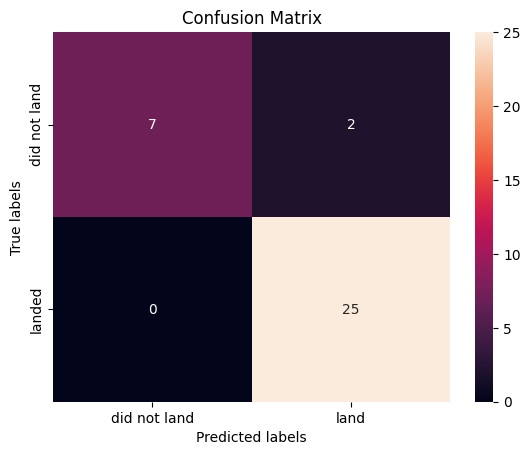

In [11]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## After the model has been trained

Run <a href="D:\Data Science\work\ML Project\predictSetup.py">predictSetup.py</a> from cmd to generate a predict.csv file.

In [12]:
pred = pd.read_csv('Data/predict.csv')
pred.head(100)

,CCSFS SLC 40,KSC LC 39A,VAFB SLC 4E,5e9e3032383ecb267a34e7c7,5e9e3032383ecb554034e7c9,5e9e3032383ecb6bb234e7ca,5e9e3032383ecb761634e7cb,5e9e3033383ecb075134e7cd,5e9e3033383ecbb9e534e7cc,B0003,...,GTO,HEO,ISS,LEO,MEO,PO,SO,SSO,TLI,VLEO
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
97,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
98,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
transform = preprocessing.StandardScaler()
pred_scaled = transform.fit_transform(pred)
pred = pd.DataFrame(pred_scaled)
pred

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
0,0.893237,-0.639010,-0.426401,-0.345261,-0.191859,-0.713392,-0.109435,-0.376685,-0.547723,12.961481,...,-0.473960,-0.077152,-0.483298,3.327376,-0.191859,-0.288675,-0.077152,-0.263857,-0.109435,-0.685248
1,0.893237,-0.639010,-0.426401,-0.345261,-0.191859,-0.713392,-0.109435,-0.376685,-0.547723,-0.077152,...,-0.473960,-0.077152,-0.483298,3.327376,-0.191859,-0.288675,-0.077152,-0.263857,-0.109435,-0.685248
2,0.893237,-0.639010,-0.426401,-0.345261,-0.191859,-0.713392,-0.109435,-0.376685,-0.547723,-0.077152,...,-0.473960,-0.077152,2.069118,-0.300537,-0.191859,-0.288675,-0.077152,-0.263857,-0.109435,-0.685248
3,-1.119524,-0.639010,2.345208,-0.345261,-0.191859,-0.713392,-0.109435,-0.376685,-0.547723,-0.077152,...,-0.473960,-0.077152,-0.483298,-0.300537,-0.191859,3.464102,-0.077152,-0.263857,-0.109435,-0.685248
4,0.893237,-0.639010,-0.426401,-0.345261,-0.191859,-0.713392,-0.109435,-0.376685,-0.547723,-0.077152,...,2.109885,-0.077152,-0.483298,-0.300537,-0.191859,-0.288675,-0.077152,-0.263857,-0.109435,-0.685248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,-1.119524,-0.639010,2.345208,-0.345261,-0.191859,1.401753,-0.109435,-0.376685,-0.547723,-0.077152,...,-0.473960,-0.077152,-0.483298,-0.300537,-0.191859,-0.288675,-0.077152,-0.263857,-0.109435,1.459325
165,0.893237,-0.639010,-0.426401,-0.345261,-0.191859,-0.713392,-0.109435,-0.376685,1.825742,-0.077152,...,-0.473960,-0.077152,-0.483298,-0.300537,-0.191859,-0.288675,-0.077152,-0.263857,-0.109435,1.459325
166,0.893237,-0.639010,-0.426401,-0.345261,-0.191859,-0.713392,-0.109435,-0.376685,1.825742,-0.077152,...,-0.473960,-0.077152,-0.483298,-0.300537,-0.191859,-0.288675,-0.077152,-0.263857,-0.109435,1.459325
167,-1.119524,1.564922,-0.426401,-0.345261,-0.191859,-0.713392,-0.109435,-0.376685,1.825742,-0.077152,...,-0.473960,-0.077152,2.069118,-0.300537,-0.191859,-0.288675,-0.077152,-0.263857,-0.109435,-0.685248


In [14]:
ans = knn_cv.predict(pred)

In [15]:
ans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [16]:
ans.shape

(169,)

In [17]:
if ans[len(ans) - 1] == 1 :
    print("Success!")
else :
    print("Failure!")

Success!
